# 1) Load Data

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
from src.classifyMNIST import *
import matplotlib.pyplot as plt
%matplotlib inline

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


# 2) Parse out Desired Digits - 2 v 9 Classifier

In [2]:
allowed_classes = [2, 9]
RD = Reduce_DataSet(mnist, allowed_classes)

In [ ]:
# train_i = RD.get_indices()
# test_i = RD.get_indices(False)

In [3]:
X_train, y_train_old = RD.reduce_train_test_set()
X_test, y_test_old = RD.reduce_train_test_set(False)

In [4]:
y_train = RD.fix_y_encoding()
y_test = RD.fix_y_encoding(False)

## Plot Some of the Train Data to verify correct Parsing

In [5]:
p = Plot(X_train, y_train_old)

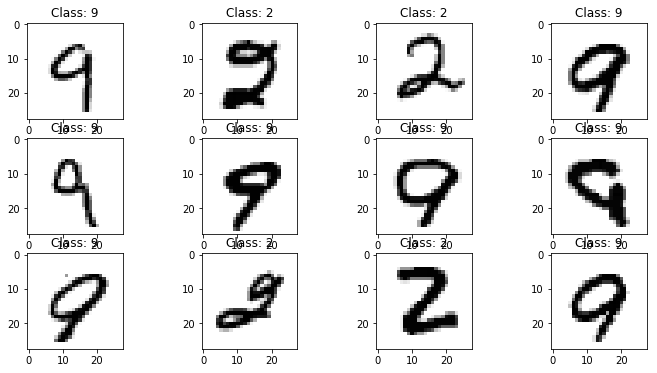

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(12, 6))

p.plot_images(axs)

# 3) Create the Model

In [7]:
num_pixels = X_train.shape[1]
num_classes = len(allowed_classes)
print ('Number of features: {}\n Number of classes: {}'.format(num_pixels, num_classes))

Number of features: 784
 Number of classes: 2


In [8]:
x_tf = tf.placeholder(tf.float32, [None, num_pixels])
y_tf = tf.placeholder(tf.float32, [None, num_classes])
W = tf.Variable(tf.zeros([num_pixels, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))
y_hat = tf.matmul(x_tf, W) + b
y_hat_proba = tf.nn.softmax(y_hat)

# 4) Define Loss and Optimizer 

The raw formulation of cross-entropy, 

    tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(tf.nn.softmax(y_hat), reduction_indices=[1])))

can be numerically unstable.

So here we use tf.nn.softmax_cross_entropy_with_logits on the ray outputs of 'y_hat', and then average them across the batch

In [9]:
cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels= y_tf, logits= y_hat))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Try Printing Accuracy DURING training

In [10]:
correct_preds = tf.equal(tf.argmax(y_tf, 1), tf.argmax(y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [11]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# 5) Train Model

Note: We will not use entire training set above, but rather only look at one "batch" at a time. 
    * Parse out desired digits (2s and 9s) for each "batch"

In [12]:
for i in range(1000):
    batch_imgs, batch_labels = mnist.train.next_batch(100)
    xs, ys_old_hot_encode = RD.reduce_train_test_set()
    ys = RD.fix_y_encoding()
    [train_accuracy] = sess.run([accuracy], feed_dict= {x_tf: xs, y_tf: ys})
    if i % 100 == 0:
        print ("Step {}, train accuracy {:0.3f}".format(i, train_accuracy))
    sess.run(train_step, feed_dict={x_tf: xs.reshape(-1, num_pixels), y_tf: ys.reshape(-1, num_classes)})    

Step 0, train accuracy 0.501
Step 100, train accuracy 0.986
Step 200, train accuracy 0.988
Step 300, train accuracy 0.989
Step 400, train accuracy 0.990
Step 500, train accuracy 0.990
Step 600, train accuracy 0.991
Step 700, train accuracy 0.991
Step 800, train accuracy 0.991
Step 900, train accuracy 0.992


# 6) Evaluate Model

In [13]:
pred_probs = y_hat_proba.eval(feed_dict= {x_tf: X_test.reshape(-1, num_pixels), y_tf: y_test.reshape(-1, num_classes)})

In [14]:
pred_probs[:5, :] 

array([[  9.99999762e-01,   2.14680540e-07],
       [  3.30329966e-03,   9.96696711e-01],
       [  1.00698635e-04,   9.99899268e-01],
       [  1.11613760e-03,   9.98883903e-01],
       [  1.02760289e-02,   9.89723921e-01]], dtype=float32)

In [15]:
test_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
print (sess.run(test_accuracy, feed_dict= {x_tf: X_test, y_tf: y_test}))

0.987751


# Repeat for 3-Way Classifier - 0 v 4 v 7

In [16]:
allowed_classes3 = [0, 4, 7]
RD3 = Reduce_DataSet(mnist, allowed_classes3)

In [17]:
X_train3, y_train_old3 = RD3.reduce_train_test_set()
X_test3, y_test_old3 = RD3.reduce_train_test_set(False)

In [18]:
y_train3 = RD3.fix_y_encoding()
y_test3 = RD3.fix_y_encoding(False)

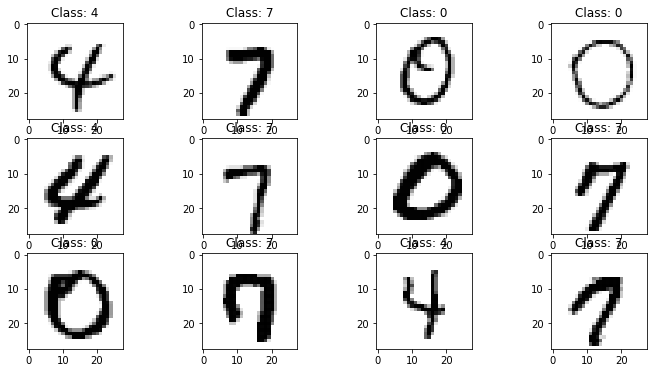

In [19]:
p3 = Plot(X_train3, y_train_old3)
fig3, axs3 = plt.subplots(3, 4, figsize=(12, 6))

p3.plot_images(axs3)

## Model

In [20]:
num_pixels3 = X_train3.shape[1]
num_classes3 = len(allowed_classes3)
print ('Number of features: {}\n Number of classes: {}'.format(num_pixels3, num_classes3))

Number of features: 784
 Number of classes: 3


In [21]:
x_tf3 = tf.placeholder(tf.float32, [None, num_pixels3])
y_tf3 = tf.placeholder(tf.float32, [None, num_classes3])
W3 = tf.Variable(tf.zeros([num_pixels3, num_classes3]))
b3 = tf.Variable(tf.zeros([num_classes3]))
y_hat3 = tf.matmul(x_tf3, W3) + b3
y_hat_proba3 = tf.nn.softmax(y_hat)

In [22]:
W3 = tf.Variable(tf.zeros([num_pixels3, num_classes3]))
b3 = tf.Variable(tf.zeros([num_classes3]))
y_hat = tf.matmul(x_tf3, W3) + b3
y_hat_proba3 = tf.nn.softmax(y_hat3)

In [23]:
cross_entropy3 = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels= y_tf3, logits= y_hat3))
train_step3 = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy3)

In [24]:
correct_preds3 = tf.equal(tf.argmax(y_tf3, 1), tf.argmax(y_hat3, 1))
accuracy3 = tf.reduce_mean(tf.cast(correct_preds3, tf.float32))

In [25]:
sess3 = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [26]:
for i in range(1000):
    batch_imgs3, batch_labels3 = mnist.train.next_batch(100)
    xs3, ys_old_hot_encode3 = RD3.reduce_train_test_set()
    ys3 = RD3.fix_y_encoding()
    [train_accuracy3] = sess3.run([accuracy3], feed_dict= {x_tf3: xs3, y_tf3: ys3})
    if i % 100 == 0:
        print ("Step {}, train accuracy {:0.3f}".format(i, train_accuracy3))
    sess3.run(train_step3, feed_dict={x_tf3: xs3.reshape(-1, num_pixels3), y_tf3: ys3.reshape(-1, num_classes3)})

Step 0, train accuracy 0.331
Step 100, train accuracy 0.987
Step 200, train accuracy 0.988
Step 300, train accuracy 0.989
Step 400, train accuracy 0.990
Step 500, train accuracy 0.990
Step 600, train accuracy 0.990
Step 700, train accuracy 0.991
Step 800, train accuracy 0.991
Step 900, train accuracy 0.991


In [27]:
pred_probs3 = y_hat_proba3.eval(feed_dict= {x_tf3: X_test3.reshape(-1, num_pixels3), 
                                            y_tf3: y_test3.reshape(-1, num_classes3)})

In [28]:
pred_probs3[:5]

array([[  1.69055333e-04,   5.36948346e-06,   9.99825656e-01],
       [  9.99898911e-01,   9.19810716e-08,   1.00930498e-04],
       [  3.19543877e-04,   9.89407241e-01,   1.02732303e-02],
       [  2.44016937e-05,   9.98762131e-01,   1.21348316e-03],
       [  9.99958515e-01,   3.24547036e-05,   9.05249453e-06]], dtype=float32)

In [29]:
correct_preds3 = tf.equal(tf.argmax(y_tf3, 1), tf.argmax(y_hat3, 1))
accuracy3 = tf.reduce_mean(tf.cast(correct_preds3, tf.float32))
print (sess3.run(accuracy3, feed_dict= {x_tf3: X_test3, y_tf3: y_test3}))

0.99097


# Full MNIST DataSet

In [30]:
allowed_classes = list(np.arange(10))
RD = Reduce_DataSet(mnist, allowed_classes)
num_classes = len(allowed_classes)

In [31]:
y_tf = tf.placeholder(tf.float32, [None, num_classes])
W = tf.Variable(tf.zeros([num_pixels, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))
y_hat = tf.matmul(x_tf, W) + b
y_hat_proba = tf.nn.softmax(y_hat)

In [32]:
cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels= y_tf, logits= y_hat))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [33]:
correct_preds = tf.equal(tf.argmax(y_tf, 1), tf.argmax(y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [34]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [35]:
for i in range(1000):
    batch_imgs, batch_labels = mnist.train.next_batch(100)
    xs, ys_old_hot_encode = RD.reduce_train_test_set()
    ys = RD.fix_y_encoding()
    [train_accuracy] = sess.run([accuracy], feed_dict= {x_tf: xs, y_tf: ys})
    if i % 100 == 0:
        print ("Step {}, train accuracy {:0.3f}".format(i, train_accuracy))
    sess.run(train_step, feed_dict={x_tf: xs.reshape(-1, num_pixels), y_tf: ys.reshape(-1, num_classes)})    

Step 0, train accuracy 0.099
Step 100, train accuracy 0.894
Step 200, train accuracy 0.904
Step 300, train accuracy 0.909
Step 400, train accuracy 0.913
Step 500, train accuracy 0.915
Step 600, train accuracy 0.917
Step 700, train accuracy 0.918
Step 800, train accuracy 0.919
Step 900, train accuracy 0.920


In [36]:
X_test, y_test_old = RD.reduce_train_test_set(False)
y_test = RD.fix_y_encoding(False)

In [37]:
pred_probs = y_hat_proba.eval(feed_dict= {x_tf: X_test.reshape(-1, num_pixels), y_tf: y_test.reshape(-1, num_classes)})
pred_probs[:5]

array([[  6.14158052e-05,   9.76317160e-09,   1.40559248e-04,
          2.83019803e-03,   2.61914943e-06,   3.16111909e-05,
          3.48641684e-08,   9.96371388e-01,   3.27089256e-05,
          5.29458572e-04],
       [  3.45803658e-03,   1.80573606e-05,   9.60925877e-01,
          5.06858341e-03,   9.04515296e-10,   8.12213682e-03,
          2.04090625e-02,   6.30288322e-11,   1.99826644e-03,
          1.67031065e-08],
       [  1.28991178e-05,   9.72206414e-01,   1.27524203e-02,
          3.61636397e-03,   2.25314696e-04,   1.48767279e-03,
          1.73697900e-03,   3.46246595e-03,   3.92968394e-03,
          5.69807074e-04],
       [  9.99338686e-01,   2.06136955e-10,   1.39484444e-04,
          1.53515084e-05,   3.57668739e-08,   2.85482209e-04,
          1.32066009e-04,   2.71527297e-05,   4.67472018e-05,
          1.50841734e-05],
       [  6.01712149e-04,   3.50634696e-06,   4.39170608e-03,
          1.90064777e-04,   9.50474024e-01,   4.87185665e-04,
          3.43866134e-03

In [38]:
test_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
print (sess.run(test_accuracy, feed_dict= {x_tf: X_test, y_tf: y_test}))

0.9216


## BONUS: Find most frequently misclassified digit

Among the test set, which digit is misclassified most often?

In [39]:
predicted_label = np.argmax(pred_probs, axis= 1)
actual_label = np.argmax(y_test, axis= 1)

In [40]:
incorrect_indicies = np.where(actual_label != predicted_label)

In [41]:
misclassified = actual_label[incorrect_indicies]

In [42]:
np.argmax(np.bincount(misclassified))

5

What are 5's most commonly mistaken for?

In [43]:
actual_fives = np.where(actual_label == 5)
misclassified_fives = np.where(predicted_label[actual_fives] != 5)
np.argmax(np.bincount(predicted_label[misclassified_fives]))

3

This seems reasonable...